# Term Project: 지진 관련 데이터 분석을 통한 지진 대피소 입지 분석

(1) 주제 선정 이유 <br>

2016년의 경주 지진, 2017년의 포항 지진부터 시작해 최근 뉴스를 살펴보면 우리나라도 더 이상 지진에서 안전한 국가가 아니다. 일본과 같이 지진의 가능성을 항상 열어두고 있는 나라와 달리 우리나라는 지진 발생 시 대피요령 등에 대해 잘 알지 못한다. 그 중에서도 지진대피소를 파악해두는 일은 지진 발생 시 대피 경로를 파악하기 위해 가장 중요하다. 이때 지진대피소의 범위는 2017년에 국립재난안전연구원에서 발간한 '지진대피소 지정·운영 기준 개발'의 기준에 맞춰 지진대피소의 범위를 1차 대피를 위한 지진 옥외대피장소와 임시주거시설(지진겸용)로 구분한다. 따라서 현재 지진대피소가 얼마나 구축되어 있는지,해당 대피소가 지진대피소로 적합한지, 인구 분포, 지진 횟수에 따라 지진대피소가 더 필요한 지역이 어딘지를 파악하여 추가로 지진대피소를 설치해야하는 장소 파악을 위해 이 주제를 선정했다. 

(2) 가설 정의

1. 우리나라 지역별 지진 옥외대피장소 및 임시주거시설(지진겸용)
2. 우리나라 지역별 지진 발생 횟수
3. 우리나라 지역별 인구 분포
4. 지진,해일 긴급대피장소 위치 선정 조건

위와 같은 데이터 및 관련 논문을 활용하여 최근 지진 발생 빈도에 따라 지진대피소가 더 필요한 지역은 어디인지, 인구 분포(노약자, 장애인)를 고려해 지진대피소가 더 필요한 지역이 어딘지를 파악하여 추가로 지진대피소를 설치해야하는 장소 모색, 현재 설치되어있는 지진대피소들이 지진대피소로 적합한지를 확인하고 싶다. 

(3) 인터넷을 통한 데이터 획득

1. 지진 옥외대피장소
- 공공데이터 포털 오픈 API, 활용신청 후에 인증키를 제공받아서 파이썬의 requests, json 모듈 등을 통해서 데이터를 획득함 (일일 트래픽: 10,000)
- https://www.data.go.kr/tcs/dss/selectApiDataDetailView.do?publicDataPk=15039250

2. 지진겸용 임시주거시설
- 공공데이터 포털 오픈 API, 활용신청 후에 인증키를 제공받아서 파이썬의 requests, json 모듈 등을 통해서 데이터를 획득함 (일일 트래픽: 10,000)
- https://www.data.go.kr/tcs/dss/selectApiDataDetailView.do?publicDataPk=15021030

3. 각 연도에 따른 지역별 규모별 지진발생횟수
- 국가통계포털에서 제공하는 통계표를 CSV 파일로 받아서 데이터를 획득함
- https://kosis.kr/statHtml/statHtml.do?orgId=141&tblId=TX_14101_A000&conn_path=I3

4. 대구, 경북 지역의 지진 상세 데이터
- 기상청 날씨누리의 국내 지진 조회에서 대구, 경북 지역의 지진 데이터를 엑셀 파일로 받은 후 이를 csv 파일로 변환하여 데이터를 획득함
- https://www.weather.go.kr/w/eqk-vol/search/korea.do?schOption=&xls=0&startTm=2002-01-01&endTm=2022-12-04&startSize=2&endSize=&startLat=&endLat=&startLon=&endLon=&lat=&lon=&dist=&keyword=%EA%B2%BD%EB%B6%81&dpType=m

5. 경북 지역의 만 65세 이상 인구 분포
- 경주시청 홈페이지에서 2022년 11월에 업데이트 된 인구 분포 정리 파일을 한글 파일로 받은 후 이를 csv 파일로 변환하여 데이터를 획득함
- https://www.gyeongju.go.kr/open_content/ko/page.do?mnu_uid=292&parm_mnu_uid=1592&srchBgpUid=590

(4) 분석을 위한 데이터 가공

데이터 분석을 하기에 앞서서 이 프로젝트에서는 기상청에서 발간하는 지진 연보의 기준에 맞춰 규모 2.0 미만의 매우 작은 크기의 지진, 즉 미소 지진이 아닌 규모가 2.0 이상의 지진을 다룸을 밝힌다.

In [2]:
import requests
import json
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt

1-1. 2002년 ~ 2021년 지역별 지진 발생 횟수 (표)<br>
국가통계포털에서 제공하는 2002년부터 2021년까지 전국 지역별 지진 발생 횟수 데이터를 csv파일로 받은 후 원래 규모별로 나눠져있던 열을 drop 함수를 통해 제거하고 2002년부터 2021년까지 각 지역별 총 지진 발생 횟수를 class를 정의해서 계산한 후 맨 마지막에 '총합'열을 추가했다. 

In [3]:
df_earth = pd.read_csv("./8/earthquake_Korea.csv", encoding = 'cp949')

class data:
    def __init__(self, first, second):
        self.first = first
        self.second = second
    
    # 2002년 ~ 2021년의 각 지역별 지진 발생 횟수 총합 계산
    def row_combine(self):
        blanklist = []
        total = 0 
        for i in range(2002,2022,1):
            blanklist.append(df_earth.loc[self.first,str(i)])
            
        for j in range(0, len(blanklist),1):
            total = total + int(blanklist[j])
        return total
    
    #지진의 규모에 따라 나눠져 있던 열 삭제
    def axis_delete(self):
        for i in range(1,5,1):
            df_earth.drop([str(self.second)+ "." + str(i)], axis = 1, inplace = True)
        return df_earth

# 2002년 ~ 2021년의 각 지역별 지진 발생 횟수 총합 계산
total_list = []
for i in range(2,11,1):
    new_data = data(i,0)
    combined_data = new_data.row_combine()
    total_list.append(combined_data)

#지진의 규모에 따라 나눠져 있던 열 삭제
for i in range(2002, 2022, 1):
    new_data1 = data(0,i)
    df_earth_new = new_data1.axis_delete()


df_earth_fin = df_earth_new.drop([0,1,11,12,13,14]) #불필요한 데이터 삭제
df_earth_fin['총합'] = total_list #마지막에 위에서 계산한 총합 열 추가
df_earth_fin

,지역별,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,총합
2,서울·경기·인천,1,0,2,0,0,0,4,1,1,...,1,2,1,1,0,1,4,2,1,22
3,부산·울산·경남,5,1,3,0,4,2,2,2,0,...,2,0,1,6,5,1,5,1,7,49
4,대구·경북,4,8,4,3,2,5,3,10,5,...,6,10,6,179,121,35,11,12,5,444
5,광주·전남,5,1,0,1,0,1,0,1,2,...,1,2,1,1,6,2,0,6,2,33
6,전북,1,0,1,0,2,0,1,3,1,...,0,1,1,1,2,2,0,2,5,27
7,대전·충남·세종,5,5,2,1,4,2,2,2,5,...,1,0,2,6,3,4,0,2,0,49
8,충북,2,1,0,2,2,3,0,0,0,...,3,0,1,0,2,4,2,1,1,26
9,강원,2,0,2,1,3,6,0,0,0,...,0,0,1,1,1,2,0,1,0,23
10,제주,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,2,0,0,5


1-2. 2012년 ~ 2021년 지역별 지진 발생 횟수 (그래프)<br>
어느 지역에서 지진이 가장 많이 발생했는지를 명확히 파악하기 위해 matplotlib.pyplot 모듈을 사용하여 위의 표를 막대 그래프로 시각화했다. 원래는 세로 방향 그래프로 그리려 했으나 x축의 레이블의 길이가 길어서 barh함수를 사용하여 가로 방향 그래프로 시각화했다. 또한, 한글이 깨지는 것을 막기 위해 rc함수를 통해 아래와 같이 나타냈다. 

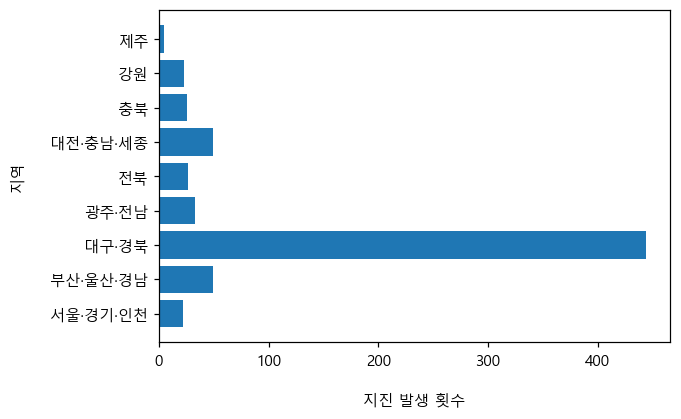

In [11]:
x_values_1 = df_earth_fin["지역별"].values
x_values = x_values_1.tolist()
y_values = total_list

x = np.array(x_values)
y = np.array(y_values)

plt.figure(dpi = 110)
plt.barh(x,y)
plt.rc('font', family="Malgun Gothic")
plt.ylabel('지역', labelpad=15)
plt.xlabel('지진 발생 횟수', labelpad=15)
plt.show()

위의 막대 그래프를 살펴보면 대구, 경북이 압도적인 숫자로 지진 발생 횟수가 많다는 것을 알 수 있다. 이에 따라 대구, 경북에서 발생한 지진에 대해 더 알아보기 위해 2002년 ~ 2022년 동안 대구와 경북 지역에서 발생한 지진의 데이터를 정리하고 발생 위치를 지도에 표시하도록 한다.<br>

2-1. 2002년 ~ 2022년 대구, 경북 지진 데이터(표)<br>
먼저 대구와 경북 지역의 지진 분포가 한꺼번에 들어있는 파일은 찾을 수가 없어서 대구와 경북 지역의 지진 분포 데이터를 따로 csv파일로 받은 후, pandas모듈의 concat함수를 이용하여 두 파일을 합쳐주었다. 제공된 데이터 특성 상 함경북도의 '경북'이라는 부분 때문에 경북 지진 데이터에 북한 지진 데이터도 포함되어 있다. 또한 해운대구의 '대구'라는 부분 때문에 대구 지진 데이터에 부산 지진 데이터도 포함되어 있다. 따라서 대구, 경북 지진 데이터만 추출하기 위해 for문과 문자열 함수, pandas 모듈의 drop 함수를 사용하여 아래와 같이 데이터를 추출하였다. 

In [4]:
df_1 = pd.read_csv("./8/earthquake_Gyeongbuk.csv", encoding = 'cp949')
df_2 = pd.read_csv("./8/earthquake_Daegu.csv", encoding = 'cp949')
df_gb = pd.concat([df_1, df_2]).reset_index()

#표에서 북한, 해운대구 데이터 제거
for index in df_gb.index:
    if df_gb.loc[index,"위치"].find("북한") != -1 or df_gb.loc[index,"위치"].find("해운대") != -1:
        df_gb.drop([index], inplace = True)
    

#지진 관련 중요 데이터만 남기고 나머지는 제거
df_gb.drop(["지도보기","상세정보","index"], axis = 1, inplace = True)
df_gb

,번호,발생시각,규모,깊이(km),최대 진도,위도,경도,위치
0,602,2022-12-01 15:17,3.2,14,Ⅲ,36.17 N,128.27 E,경북 김천시 동북동쪽 14km 지역
4,598,2022-09-11 16:28,2.4,13,Ⅰ,36.46 N,129.63 E,경북 영덕군 동북동쪽 24km 해역
5,597,2022-09-03 0:44,2.0,18,Ⅰ,36.39 N,129.89 E,경북 영덕군 동쪽 47km 해역
6,596,2022-08-24 18:31,2.1,20,Ⅰ,36.47 N,129.62 E,경북 영덕군 동북동쪽 24km 해역
7,595,2022-07-21 4:46,2.3,13,Ⅲ,35.79 N,129.20 E,경북 경주시 남남서쪽 8km 지역
...,...,...,...,...,...,...,...,...
604,6,2014-06-05 13:29,2.3,NaN,NaN,35.97 N,128.62 E,대구 동구 북쪽 10km 지역
605,5,2014-03-11 11:39,2.7,NaN,NaN,35.86 N,128.47 E,대구 달성군 서북서쪽 9km 지역
606,4,2012-06-12 17:52,2.2,NaN,NaN,35.87 N,128.67 E,대구 수성구 동북동쪽 4km 지역
607,3,2011-04-03 1:47,2.7,NaN,NaN,35.77 N,128.53 E,대구 달성군 남남서쪽 7km 지역


위의 표에 있는 데이터를 지도에 표현하기 위해서 현재 문자열로 적혀있는 위도와 경도를 실수값으로 바꿔주기 위해 class와 method를 정의해주었다. 또한, 위치와 위도 경도만을 포함하고 있는 보다 더 간결한 데이터 추출을 위해 아래와 같이 코드를 작성했다.

In [13]:
class change:
    
    def __init__(self, col):
        self.col = col
    
    #위의 표에서 위도, 경도, 위치만 따로 추출
    def tlist(self):
        values_need = df_gb[self.col].values
        values_get = values_need.tolist()
        return values_get
    
    #문자열로 적혀진 위도, 경도를 실수로 형변환
    def tofloat(self):
        blanklist = []
        for i in range(0,576,1):
            new_locate = df_map.loc[i,self.col]
            locate_str = new_locate[0:len(new_locate)-2]
            locate_flo = float(locate_str)
            blanklist.append(locate_flo)
        return blanklist

place = change("위치")
lat = change("위도")
lon = change("경도")

df_map = pd.DataFrame({'위도' : lat.tlist(), '경도' : lon.tlist(), '위치' : place.tlist()}).reset_index()
df_map["위도"] = lat.tofloat()
df_map["경도"] = lon.tofloat()
df_map

,index,위도,경도,위치
0,0,36.17,128.27,경북 김천시 동북동쪽 14km 지역
1,1,36.46,129.63,경북 영덕군 동북동쪽 24km 해역
2,2,36.39,129.89,경북 영덕군 동쪽 47km 해역
3,3,36.47,129.62,경북 영덕군 동북동쪽 24km 해역
4,4,35.79,129.20,경북 경주시 남남서쪽 8km 지역
...,...,...,...,...
571,571,35.97,128.62,대구 동구 북쪽 10km 지역
572,572,35.86,128.47,대구 달성군 서북서쪽 9km 지역
573,573,35.87,128.67,대구 수성구 동북동쪽 4km 지역
574,574,35.77,128.53,대구 달성군 남남서쪽 7km 지역


2-2. 2002년 ~ 2022년 대구, 경북 지진 데이터 (지도) <br>
대구, 경북의 행정 구역 중에서도 어디에서 주로 지진이 많이 일어나는지를 시각화하기 위해 folium모듈의 Map함수, Marker함수와 for문을 사용하여 위에 표로 추출한 데이터를 지도에 표시했다. 

In [14]:
map = folium.Map(location = [36.3,129], zoom_start = 9) #경북도청에 나와있는 경상북도의 대략적 위도, 경도를 참고함

for index in df_map.index:
    eq_lat = df_map.loc[index,"위도"]
    eq_lon = df_map.loc[index,"경도"]
    folium.Marker([eq_lat,eq_lon]).add_to(map)

map

2-3. 2002년~2022년 대구, 경북 지역별 지진 데이터(표)<br>
2-1에서 얻은 표로부터 대구, 경북의 행정 구역별 지진 데이터를 얻기 위해서 먼저 대구, 경북의 행정 구역을 하나의 리스트에 넣어주었다. 또한, class안에서 count 메소드를 문자열 함수 find와 for문을 사용하여 정의해주고, 이를 통해 얻은 값을 또 한번 for문을 사용하여 리스트에 넣어주었다. 행정 구역 이름이 들어있는 리스트와 지역별 지진 발생 횟수가 들어있는 리스트를 사용하여 아래와 같이 DataFrame을 생성해주었다.

In [15]:
gb_area = ["포항", "경주", "김천", "안동", "구미", "영주", "영천", "상주", "문경", "경산", "군위", "의성", "청송", "영양", "영덕", "청도", "고령", "성주", "칠곡", "예천", "봉화", "울진", "울릉", "대구"]

#대구,경북 지역별 지진 발생 횟수 정리
class sort:
    
    def __init__(self, area):
        self.area = area
        
    def count(self):
        total = 0
        for index in df_map.index:
            if df_map.loc[index,"위치"].find(self.area) != -1:
                total = total + 1
            else:
                pass
        return total

count_list = []

for i in range(0,len(gb_area),1):
    a = sort(gb_area[i])
    count_list.append(a.count())

df_gb_area = pd.DataFrame({'지역' : gb_area, '지진 발생 횟수' : count_list})
df_gb_area

,지역,지진 발생 횟수
0,포항,152
1,경주,223
2,김천,17
3,안동,11
4,구미,5
5,영주,3
6,영천,1
7,상주,18
8,문경,8
9,경산,0


2-4. 2002년~2022년 경북 지역별 지진 데이터(그래프)<br>
2-3에서 얻은 행정 구역 리스트와 구역별 지진 발생 횟수 리스트, 그리고 matplotlib.pyplot 모듈을 사용하여 아래와 같이 가로방향 막대그래프로 해당 데이터를 시각화했다. 축에 들어간 단어들이 많아서 dpi를 조정하여 아래와 같이 나타냈다.

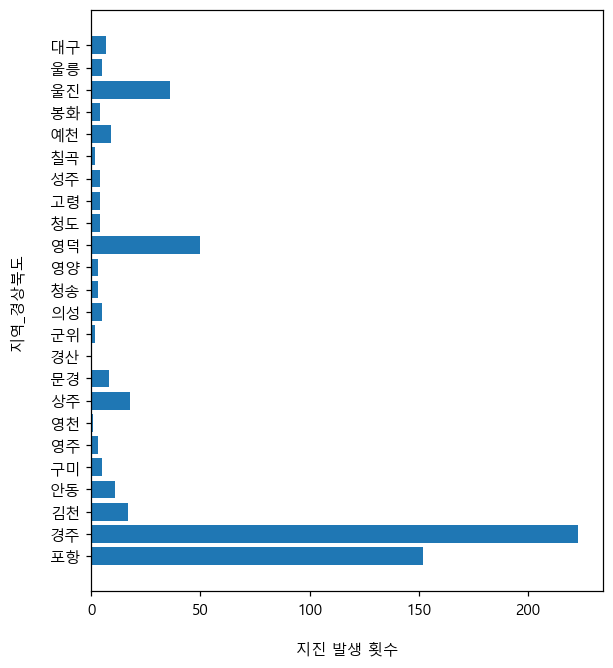

In [16]:
x= np.array(gb_area)
y = np.array(count_list)

plt.figure(figsize = (6,7), dpi = 110)
plt.barh(x,y)
plt.rc('font', family="Malgun Gothic")
plt.ylabel('지역_경상북도', labelpad=15)
plt.xlabel('지진 발생 횟수', labelpad=15)
plt.show()

위의 표와 그림을 살펴보면 2002년부터 2022년까지의 지진 발생 횟수가 경주에서 압도적으로 높다는 것을 알 수 있다. 이에 따라 앞선 데이터들이 보여주듯이 우리나라에서 지진 발생 위험이 가장 큰 경주에서의 지진 옥외대피소, 지진겸용 임시거주시설 입지에 대한 분석을 진행했다. 이때 지진 옥외대피소는 지진발생초기 운동장, 공터 등 구조물 파손 및 낙하물로부터 안전한 외부대피장소을 의미하고, 지진겸용 임시거주시설은 내진성능이 확보된 시설로 지진과 풍수해 등으로 주거시설을 상실하거나 사실상 주거가 불가능한 이재민 및 일시대피자의 임시 거주를 위하여 제공되는 시설물을 의미한다. 

3-1.지진 발생지역(경주) <br>
앞서 얻은 경북, 대구 행정 구역별 지진 발생 횟수 DataFrame에서 경주 지역만 추출하기 위해서 pandas의 loc함수와 문자열 함수 find를 사용하였다.

In [17]:
#경북의 지진 발생 지역 표에서 경주 지역만 추출
for index in df_map.index:
    if df_map.loc[index,"위치"].find("경주") == -1:
        df_map.drop([index], inplace = True)

df_gj = df_map.reset_index()
df_gj

,level_0,index,위도,경도,위치
0,4,4,35.79,129.20,경북 경주시 남남서쪽 8km 지역
1,12,12,35.69,129.35,경북 경주시 남남동쪽 22km 지역
2,21,21,35.76,129.19,경북 경주시 남남서쪽 11km 지역
3,22,22,35.76,129.18,경북 경주시 남남서쪽 11km 지역
4,27,27,35.75,129.17,경북 경주시 남남서쪽 13km 지역
...,...,...,...,...,...
218,548,548,35.80,129.40,경북 경주시 동남동쪽 17km 지역
219,551,551,35.80,129.40,경북 경주시 동남동쪽 17km 지역
220,557,557,35.80,129.30,경북 경주시 동남동쪽 9km 지역
221,559,559,35.80,129.40,경북 경주시 동남동쪽 17km 지역


3-2. 지진 옥외대피소(경주)<br>
공공데이터 포털에서 해당 데이터를 xml또는 json형태로 받을 수 있는데, json형태로 받아서 class와 그 안에 method를 정의하고 이를 통해 json형태로 되어있던 데이터를 하나의 DataFrame로 만들었다. 그 후 for문을 사용하여 경주에 관한 데이터만 추출하여 아래와 같이 DataFrame을 생성했다. 

In [17]:
class Arealist:
    
    def __init__(self, pageNo):
        self.pageNo = pageNo
     
    #공공 데이터 포털에서 인증키를 받아서 json형태로 데이터를 받음
    def getdf(self):
        url = 'http://apis.data.go.kr/1741000/EmergencyAssemblyArea_Earthquake2/getArea1List'
        params ={'serviceKey' : 'DHMEI6ibBqZG6chMBtdB0ds0H66z4nhiUgYwYOU16LS6rLc/ipB3hDTliOeB9SUCKufFU58/EFr1ggA0Tqptjg==', 'pageNo' : str(self.pageNo), 'numOfRows' : '10', 'type' : 'json' }
        response = requests.get(url, params=params)
        eq_outdoor = json.loads(response.text)
        eq_outdoor_fin = eq_outdoor['EarthquakeOutdoorsShelter'][1]['row']
        df_outdoor = pd.DataFrame(eq_outdoor_fin)
        return df_outdoor

df_all = pd.DataFrame()

for i in range(1,1095,1):
    area = Arealist(i)
    df = area.getdf()
    df_all = pd.concat([df_all, df])

df_outDoor = df_all.reset_index()
for index in df_outDoor.index:
    if df_outDoor.loc[index,"dtl_adres"].find("경주") == -1:
        df_outDoor.drop([index], inplace = True)
        
df_outDoor.drop(["index"], axis = 1, inplace = True)
df_outDoor_fin = df_outDoor.reset_index()
df_outDoor_fin

,index,arcd,acmdfclty_sn,ctprvn_nm,sgg_nm,vt_acmdfclty_nm,rdnmadr_cd,bdong_cd,hdong_cd,dtl_adres,fclty_ar,xcord,ycord
0,836,4713000000,45,경상북도,경주시,서라벌여자중학교 운동장,4713012400110530018014571,4713012400,4713062100,경상북도 경주시 황성동 1053-18,8217,129.21705546987803,35.85483931092816
1,837,4713000000,47,경상북도,경주시,계림고등학교 운동장,4713012400108970001024904,4713012400,4713062100,경상북도 경주시 황성동 897-1,8969,129.2085567957472,35.865919923166715
2,838,4713000000,44,경상북도,경주시,신라중학교 운동장,4713012400110530018014459,4713012400,4713062100,경상북도 경주시 황성동 1053-18,9444,129.21705546987803,35.85483931092816
3,839,4713000000,46,경상북도,경주시,계림중학교 운동장,4713012400104690008024724,4713012400,4713062100,경상북도 경주시 황성동 469-8,9426,129.21396030224415,35.863850559353466
4,840,4713000000,43,경상북도,경주시,용황초등학교 운동장,4713012500111770000033332,4713012400,4713061500,경상북도 경주시 황성동 325-1,5907,129.22075707528742,35.86506131385571
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,3093,4713000000,111,경상북도,경주시,의곡초등학교 운동장,,4713034026,4713034026,경상북도 경주시 산내면 의곡리 89-14,2063,129.047415,35.7551
128,3094,4713000000,113,경상북도,경주시,산내중학교 운동장,4713034026100700065118571,4713034026,4713034000,경상북도 경주시 산내면 의곡리 70-65,2968,129.0464963887842,35.752389924875985
129,3095,4713000000,112,경상북도,경주시,의곡초등학교 우라분교 운동장,4713034028600000020129777,4713034028,4713034000,경상북도 경주시 산내면 우라리 939-2,5414,129.01317277469536,35.81248818455189
130,3096,4713000000,115,경상북도,경주시,대현초등학교 운동장,4713034029131910002099239,4713034029,4713034000,경상북도 경주시 산내면 대현리 3191-2,2492,129.05764530570528,35.728961015768526


3-3. 지진 겸용 임시거주시설(경주)<br>
공공데이터 포털에서 해당 데이터를 xml또는 json형태로 받을 수 있는데, json형태로 받아서 class와 그 안에 method를 정의하고 이를 통해 json형태로 되어있던 데이터를 하나의 DataFrame로 만들었다. 그 후 for문을 사용하여 경주에 관한 데이터만 추출하여 아래와 같이 DataFrame을 생성했다. 

In [19]:
class indoorlist:
    
    def __init__(self, pageNo):
        self.pageNo = pageNo
    
     #공공 데이터 포털에서 인증키를 받아서 json형태로 데이터를 받음
    def Getdf(self):
        url = 'http://apis.data.go.kr/1741000/EarthquakeIndoors2/getEarthquakeIndoors1List'
        params ={'serviceKey' : 'DHMEI6ibBqZG6chMBtdB0ds0H66z4nhiUgYwYOU16LS6rLc/ipB3hDTliOeB9SUCKufFU58/EFr1ggA0Tqptjg==', 'pageNo' : str(self.pageNo), 'numOfRows' : '10', 'type' : 'json' }
        response = requests.get(url, params=params)
        eq_indoor = json.loads(response.text)
        eq_indoor_fin = eq_indoor['EarthquakeIndoors'][1]['row']
        df_indoor = pd.DataFrame(eq_indoor_fin)
        return df_indoor

df_all_in = pd.DataFrame()

for i in range(1,538,1):
    area_in = indoorlist(i)
    df = area_in.Getdf()
    df_all_in = pd.concat([df_all_in, df])

df_inDoor = df_all_in.reset_index()
for index in df_inDoor.index:
    if df_inDoor.loc[index,"dtl_adres"].find("경주") == -1:
        df_inDoor.drop([index], inplace = True)
        
df_inDoor.drop(["index"], axis = 1, inplace = True)
df_inDoor_fin = df_inDoor.reset_index()
df_inDoor_fin

,index,arcd,acmdfclty_sn,ctprvn_nm,sgg_nm,vt_acmdfclty_nm,rdnmadr_cd,bdong_cd,hdong_cd,dtl_adres,fclty_ar,xcord,ycord,mngps_nm,mngps_telno
0,265,4713000000,429,경상북도,경주시,양북초등학교,4713031021107010000053947,4713031021,4713031000,경상북도 경주시 문무대왕면 어일남길 2,694,129.443638,35.785640,정재랑,054-746-4501
1,1296,4713000000,306,경상북도,경주시,한국국제통상마이스터고등학교,4713025025104780002132677,4713025025,4713025000,경상북도 경주시 감포읍 감포로12길 20,576,129.506757,35.811077,,
2,1352,4713000000,315,경상북도,경주시,무산고등학교,4713025625106860053120989,4713025625,4713025600,경상북도 경주시 건천읍 천포방내길 18,814,129.097505,35.845204,,
3,1353,4713000000,416,경상북도,경주시,천포초등학교,4713025625107210000124114,4713025625,4713025600,경상북도 경주시 건천읍 단석로 1929,156,129.094669,35.845493,,
4,1354,4713000000,417,경상북도,경주시,건천초등학교,4713025631102290000071573,4713025631,4713025600,경상북도 경주시 건천읍 내서로 1105,1084,129.103196,35.850732,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,1726,4713000000,382,경상북도,경주시,경주공업고등학교,4713010900100700000004441,4713010900,4713057000,경상북도 경주시 금성로 209(사정동),726,129.205869,35.835956,,
58,1727,4713000000,381,경상북도,경주시,신라초등학교,4713010900104460001004431,4713010900,4713057000,경상북도 경주시 금성로183번길 28(사정동),198,129.204255,35.834519,,
59,1728,4713000000,332,경상북도,경주시,월성중학교,4713011400105490006036269,4713011400,4713059000,경상북도 경주시 충효7길 19(충효동),264,129.176146,35.842322,,
60,1729,4713000000,334,경상북도,경주시,신라고등학교,4713011400101910000012102,4713011400,4713059000,경상북도 경주시 태종로 526(충효동),896,129.187591,35.840089,,


(5) 분석 결과 도출

1. 경주시 행정구역별 노인비율<br>
경주시청에서 데이터를 csv 형태로 받은 후 pandas 모듈을 사용하여 DataFrame을 생성했다. 그후 비율 열에 들어있는 값을 sort_values함수를 사용하여 오름차순으로 정리해서 아래와 같이 나타냈다. 

In [5]:
df_pop = pd.read_csv("./8/population_gj.csv", encoding = 'cp949')
df_pop.sort_values('비율')

,읍면동,총인구,만65세이상,비율,Unnamed: 4
19,용강동,"24,002","2,742",11.42,NaN
20,황성동,"27,895","3,394",12.17,NaN
10,현곡면,"21,591","3,147",14.58,NaN
17,선도동,"14,645","2,516",17.18,NaN
21,동천동,"21,906","4,116",18.79,NaN
4,외동읍,"22,245","5,330",23.96,NaN
0,전체,"249,845","61,663",24.68,NaN
22,불국동,"9,922","2,678",26.99,NaN
15,성건동,"13,801","4,045",29.31,NaN
2,안강읍,"23,601","7,005",29.68,NaN


2. (4)에서 얻은 데이터를 지도에 표시<br>
(4)와 위에서 얻은 데이터를 folium 모듈에서 Map 함수, Marker 함수를 이용하여 아래와 같이 지도에 나타냈다. 세가지 다른 데이터를 한 지도에 나타내고 이를 구별하기 위해서 icon함수를 사용하여 다른 빨강색, 주황색, 파랑색을 사용하여 아래와 같이 나타냈다. 

In [47]:
m = folium.Map(location = [35.8561719,129.2247477], zoom_start = 10.5)

for index in df_outDoor_fin.index:
    outdoor_latitude = float(df_outDoor_fin.loc[index,"ycord"])
    outdoor_longtitude = float(df_outDoor_fin.loc[index,"xcord"])
    folium.Marker([outdoor_latitude, outdoor_longtitude], tooltip = "옥외", icon = folium.Icon(color = 'red')).add_to(m)
    
for index in df_inDoor_fin.index:
    indoor_latitude = float(df_inDoor_fin.loc[index,"ycord"])
    indoor_longtitude = float(df_inDoor_fin.loc[index,"xcord"])
    folium.Marker([indoor_latitude, indoor_longtitude], tooltip = "실내", icon = folium.Icon(color = 'orange')).add_to(m)
    
for index in df_gj.index:
    eq_lat = df_gj.loc[index,"위도"]
    eq_lon = df_gj.loc[index,"경도"]
    folium.Marker([eq_lat,eq_lon], tooltip = "지진").add_to(m)

m

(6) 결론<br>

- 먼저 국립재난안전연구원에서 발행한 지진대피소 지정,운영 기준 개발에 따르면 우리나라에는 아직 지진대피소 입지에 관련된 뚜렷한 기준이 없고 그 숫자가 적다고 한다. 따라서 점차 지진 발생 횟수가 늘어나고 있는 우리나라에서도 지진 발생 초기에 대피해야하는 옥외대피소의 숫자를 더 많이 확보하고, 대피 경로를 파악하기 위해 옥외대피소와 임시거주시설을 구분하여 시민들이 바로 찾을 수 있는 시스템이 필요하다고 생각했다.<br>
- 위의 지도에서는 내남면이 다른 지역에 비해 눈에 띄게 지진 횟수(파란색)가 많은 것에 비해 임시거주시설(주황색), 옥외대피소(빨강색)의 숫자가 적은 것을 알 수 있다. 거기에다가 내남면은 위의 경주의 만 65세 이상 인구 분포에서 3번째로 노인 인구 비율이 높은 만큼 어르신들이 많이 거주하는 지역이기에 상대적으로 거동이 불편한 어르신들을 위해서 보다 더 많은 임시거주시설과 옥외대피소 확보가 필요해보인다.<br> 
- 임시거주시설(주황색), 옥외대피소(빨강색)이 시내동지구(경주의 중간)에 몰려있고, 산내면, 서면과 같이 노인 분포가 높은 지역에는 그 숫자가 적은 것으로 보아 보다 더 고른 분포로 임시거주시설, 옥외대피소를 설치해야 할 것으로 보인다. <br>
- 위의 경북지역의 인구 분포 표에서 알 수 있듯이 시내동지구(경주의 중간으로써, 여러 동이 모여있는 곳)에 인구 수가 많은 만큼 시내동지구에 설치된 옥외대피소와 임시거주시설을 적절하다고 볼 수 있다. 다만, 시내동지구를 제외하고는 임시거주시설, 옥외대피소의 숫자가 많지 않기 때문에 더 많은 지진대피소가 확보가 필요하다. 

(7) 참고문헌<br>

1. 경상북도의 위도, 경도 및 행정구역
https://www.gb.go.kr/Main/open_contents/section/marinefishery/page.do;jsessionid=cRbzEXDaJ3hUwagL9BLetms1EAPa1LdJaguxiRaGJIuB3QLs7yUesHf0HyWIJSaq.www_servlet_engine10?mnu_uid=6815&LARGE_CODE=720&MEDIUM_CODE=60&SMALL_CODE=10&SMALL_CODE2=10&SMALL_CODE3=30&

2. 기상청, 2021 지진연보

3. 국립재난안전연구원, 지진대피소 지정,운영 기준 개발